# Bike store sales

In [2]:
#importing the libraries
import numpy as np
import pandas as pd

In [4]:
#reading the data
df=pd.read_csv("Resources/sales_data.csv",index_col=0)
df.head()

,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
Date,,,,,,,,,,,,,,,
2014-03-05,5,March,2014,34,M,United States,California,Accessories,Fenders,Fender Set - Mountain,27,8,22,366,582
2013-08-18,18,August,2013,31,F,Canada,British Columbia,Clothing,Vests,"Classic Vest, L",13,24,64,512,824
2014-02-04,4,February,2014,31,F,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Yellow, 54",1,1482,2384,378,1860
2013-09-09,9,September,2013,33,M,Australia,Victoria,Accessories,Tires and Tubes,LL Road Tire,25,8,21,215,415
2016-05-16,16,May,2016,35,F,United States,Washington,Accessories,Tires and Tubes,Mountain Tire Tube,28,2,5,53,109


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2014-03-05 to 2014-03-09
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Day               5000 non-null   int64 
 1   Month             5000 non-null   object
 2   Year              5000 non-null   int64 
 3   Customer_Age      5000 non-null   int64 
 4   Customer_Gender   5000 non-null   object
 5   Country           5000 non-null   object
 6   State             5000 non-null   object
 7   Product_Category  5000 non-null   object
 8   Sub_Category      5000 non-null   object
 9   Product           5000 non-null   object
 10  Order_Quantity    5000 non-null   int64 
 11  Unit_Cost         5000 non-null   int64 
 12  Unit_Price        5000 non-null   int64 
 13  Profit            5000 non-null   int64 
 14  Revenue           5000 non-null   int64 
dtypes: int64(8), object(7)
memory usage: 625.0+ KB


In [6]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,15.668800,2014.405000,35.933800,11.820400,278.415000,470.680600,291.653400,772.758000
std,8.797783,1.266055,11.087886,9.607841,562.721951,941.590529,457.359971,1306.052588
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-24.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,367.000000,829.250000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,5342.000000,14026.000000


### The informaiton of customer from summary_table
 
   ##### This data is from <b>2011 to <b>2016.
   ##### The Average of Customer_Age is 36 with youngest customer was 17 years old and the oldest was 87!

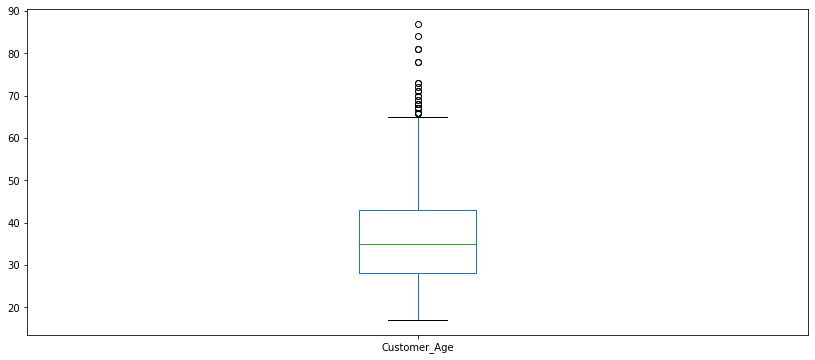

In [7]:
df['Customer_Age'].plot(kind='box',figsize=(14,6))

### What was the best and worst monthes for sales 

In [8]:
print(f"The best monthes for sale was:\n {df['Month'].value_counts().head(4)}")
print()
print(f"The worst monthes for sale was:\n {df['Month'].value_counts().tail(4)}")

The best monthes for sale was:
 May         474
April       472
June        469
December    466
Name: Month, dtype: int64

The worst monthes for sale was:
 February     382
July         364
September    359
August       357
Name: Month, dtype: int64


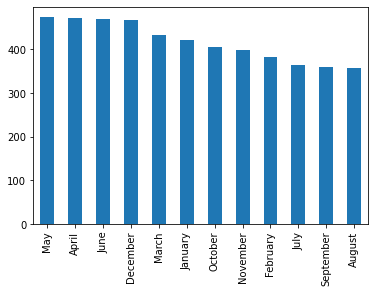

In [9]:
df['Month'].value_counts().plot(kind='bar')

## how about the year!

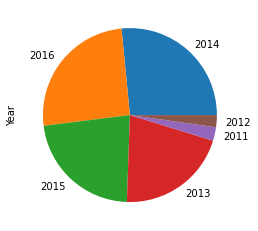

In [10]:
df['Year'].value_counts().plot(kind='pie')

### How many order were made in month of May of every 6 years?

In [11]:
[[df[(df['Month']=='May')&(df['Year']==i)] for i in df['Year'].unique()][j].shape[0] for j in range(6)]


[210, 16, 214, 13, 13, 8]

## In which country was the most and least sales?

In [12]:
print(f"The country with the most sales:\n {df['Country'].value_counts().head(1)}")
print()
print(f"The country with the least sales:\n {df['Country'].value_counts().tail(1)}")

The country with the most sales:
 United States    1700
Name: Country, dtype: int64

The country with the least sales:
 Germany    484
Name: Country, dtype: int64


### In which state of United States has the most and least sales

In [13]:
print(f"The state with the most sales:\n {df['State'].value_counts().head(1)}")
print()
print(f"The state with the least sales:\n {df['State'].value_counts().tail(1)}")

The state with the most sales:
 California    959
Name: State, dtype: int64

The state with the least sales:
 Missouri    1
Name: State, dtype: int64


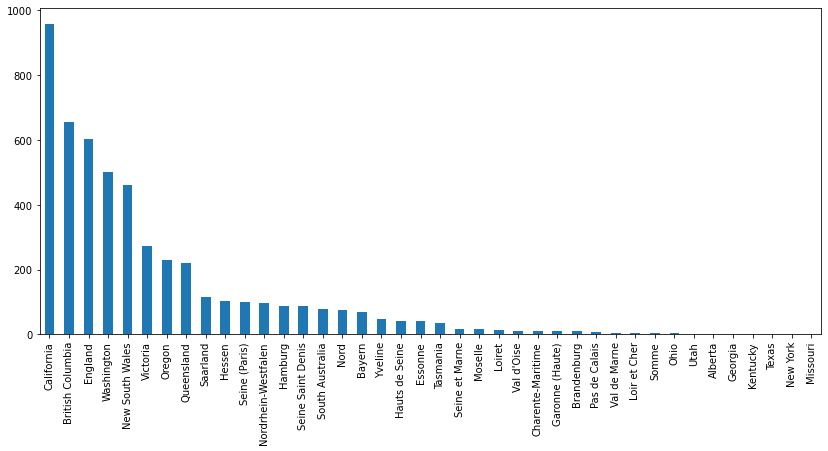

In [14]:
df['State'].value_counts().plot(kind='bar', figsize=(14,6))